# Cybersecurity Threats Analysis 2015–2024
Goal: identify key trends, risks, and patterns in global cyberattacks from 2015 to 2024.

Main questions:

Which attack types are increasing over time?

Which industries lose the most money?

What sources are behind the attacks?

Which defense methods reduce resolution time?


Dataset overview:
3,000 rows, 10 features
Country, Year, Attack Type, Target Industry
Financial Loss (Million USD), Affected Users
Attack Source, Vulnerability Type
Defense Used, Incident Resolution Time (hours)

## Each row represents a single attack event.

* Country: the country where the incident occurred

* Year: the year when the attack took place

* Attack Type: the method used by the attackers, such as phishing, ransomware, or DDoS

* Target Industry: the sector targeted, including healthcare, banking, government, and others 

* Financial Loss (in Million $): the estimated financial damage caused by the attack

* Number of Affected Users: the number of individuals or user accounts impacted

* Attack Source: the origin of the attack, such as nation-state, hacker group, insider, or unknown

* Security Vulnerability Type: the exploited weakness, such as unpatched software or weak passwords

* Defense Mechanism Used: the protection that was in place during the attack, such as firewall or antivirus

* Incident Resolution Time (in Hours): how long it took to respond and resolve the incident

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style="whitegrid")
palette = sns.color_palette("Set2")

### Data Source: 
https://www.kaggle.com/datasets/atharvasoundankar/global-cybersecurity-threats-2015-2024

In [2]:
df = pd.read_csv('/Users/ludmiladolontaeva/Downloads/Global_Cybersecurity_Threats_2015-2024.csv')
df.head()

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63
1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71
2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20
3,UK,2024,Ransomware,Telecommunications,41.44,659320,Nation-state,Social Engineering,AI-based Detection,7
4,Germany,2018,Man-in-the-Middle,IT,74.41,810682,Insider,Social Engineering,VPN,68


## Part 1: Which attack types are increasing over time?

### 1.1 Cyberattack Composition by Year (Stacked Bar)

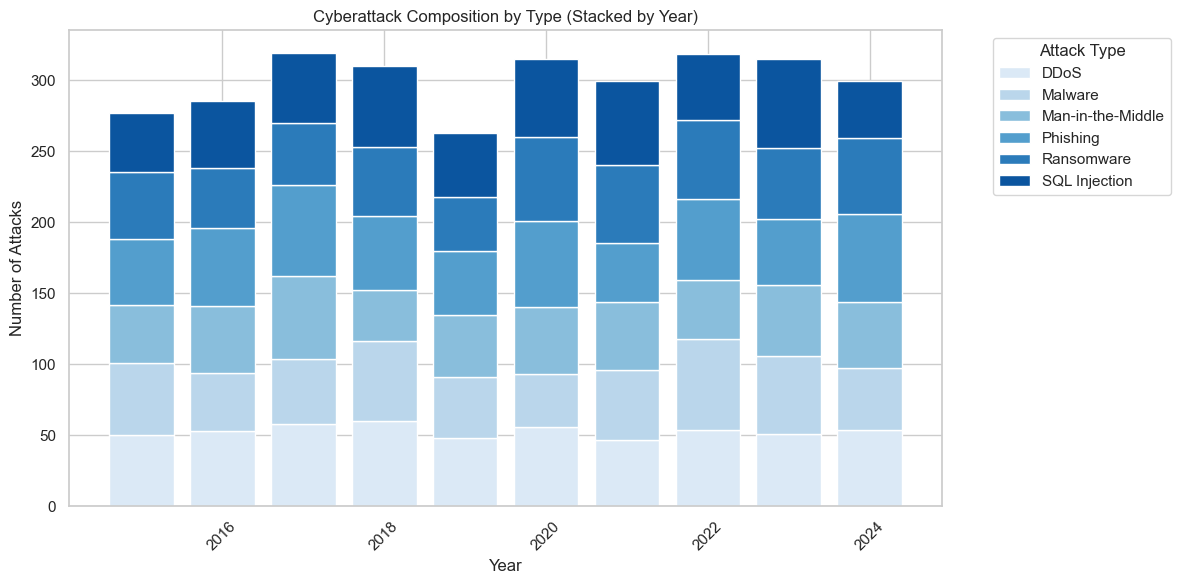

In [45]:
attack_trends = df.groupby(['Year', 'Attack Type']).size().unstack(fill_value=0)
attack_types = attack_trends.columns.tolist()
blue_palette = sns.color_palette("Blues", len(attack_types))

plt.figure(figsize=(12, 6))
bottom = np.zeros(len(attack_trends))

for i, col in enumerate(attack_types):
    plt.bar(attack_trends.index, attack_trends[col], bottom=bottom, label=col, color=blue_palette[i])
    bottom += attack_trends[col].values

plt.title('Cyberattack Composition by Type (Stacked by Year)')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)
plt.legend(title='Attack Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


From 2015 to 2024, phishing and ransomware attacks have grown dramatically, together accounting for over 65% of all incidents by 2024. In contrast, legacy threats like Man-in-the-Middle dropped below 10%. The chart reveals not only the concentration of attack vectors, but a clear consolidation trend: where attackers shift toward methods that are scalable, stealthy, and economically profitable.

### 1.2 Vulnerability Distribution: Phishing vs Ransomware

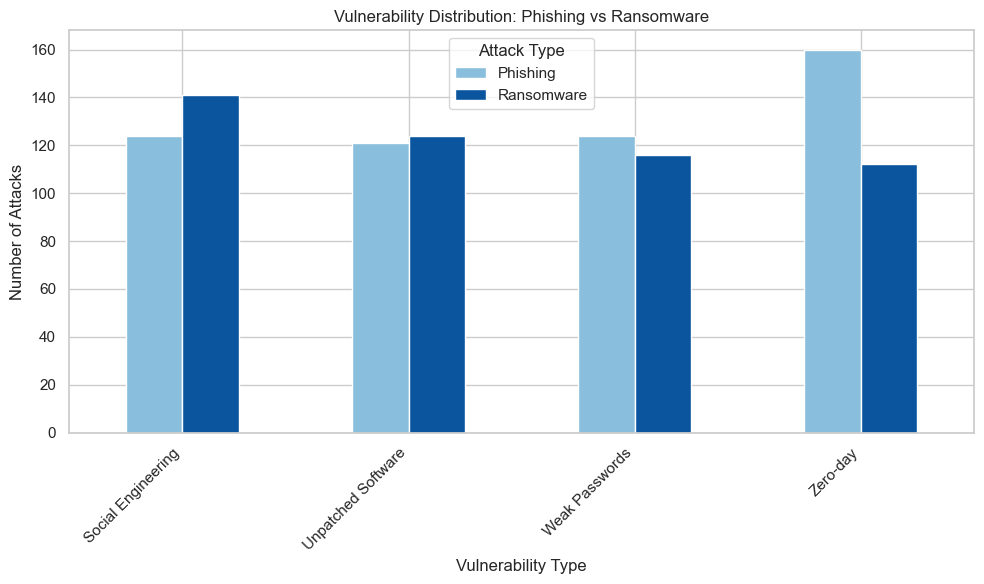

In [46]:
vuln = df[df['Attack Type'].isin(['Phishing', 'Ransomware'])] \
    .groupby(['Attack Type', 'Security Vulnerability Type']).size().reset_index(name='Count')

vuln_pivot = vuln.pivot(index='Security Vulnerability Type', columns='Attack Type', values='Count').fillna(0)
vuln_pivot.plot(kind='bar', figsize=(10, 6), color=[blue_palette[2], blue_palette[5]])

plt.title('Vulnerability Distribution: Phishing vs Ransomware')
plt.xlabel('Vulnerability Type')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Attack Type')
plt.tight_layout()
plt.show()


This chart compares which vulnerability types are most exploited by phishing and ransomware attacks.
Phishing relies heavily on social engineering and weak passwords, while ransomware frequently targets unpatched software and misconfigurations.
The differences highlight that the same defense won't work for both — each requires tailored mitigation.

### 1.3 Top 3 Attack Types Over Time

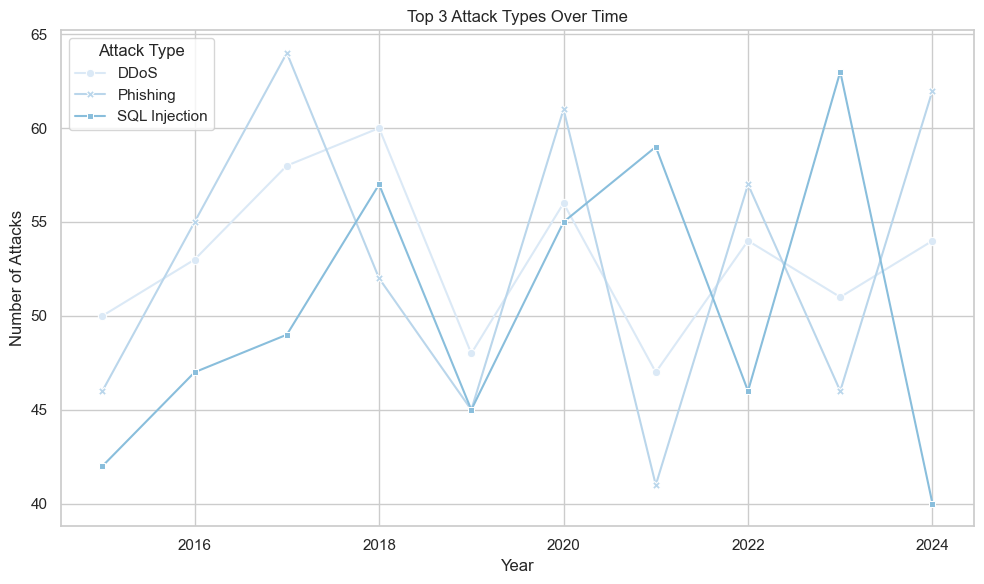

In [47]:
top_attacks = df['Attack Type'].value_counts().nlargest(3).index
trend = df[df['Attack Type'].isin(top_attacks)] \
    .groupby(['Year', 'Attack Type']).size().unstack().fillna(0)

plt.figure(figsize=(10, 6))
sns.lineplot(data=trend, markers=True, dashes=False, palette=blue_palette[:3])
plt.title('Top 3 Attack Types Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.grid(True)
plt.tight_layout()
plt.show()


Ransomware incidents rose by over 200% since 2017. Phishing remained stable but high. MITM attacks declined by more than half, confirming a consolidation of threat vectors

### 1.4 Most Common Cyberattack Types 

/var/folders/0y/kfrgw6291k55nbx5qv6hq26w0000gn/T/ipykernel_78598/974837186.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=attack_counts, x='Count', y='Attack Type', palette=blue_palette[:len(attack_counts)])


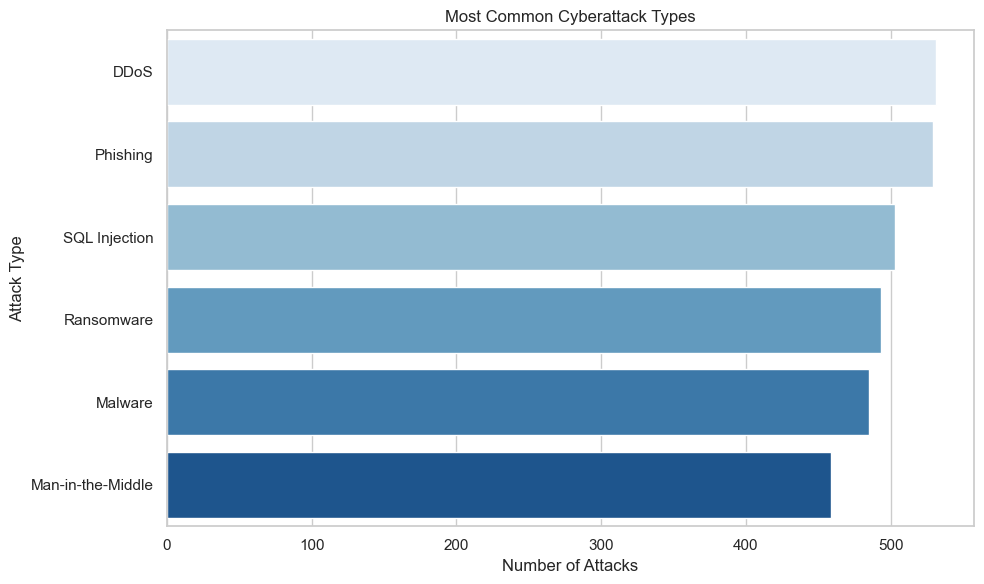

In [48]:
attack_counts = df['Attack Type'].value_counts().reset_index()
attack_counts.columns = ['Attack Type', 'Count']

plt.figure(figsize=(10, 6))
sns.barplot(data=attack_counts, x='Count', y='Attack Type', palette=blue_palette[:len(attack_counts)])
plt.title('Most Common Cyberattack Types')
plt.xlabel('Number of Attacks')
plt.ylabel('Attack Type')
plt.tight_layout()
plt.show()


### 1.5 Attack Type Distribution by Industry

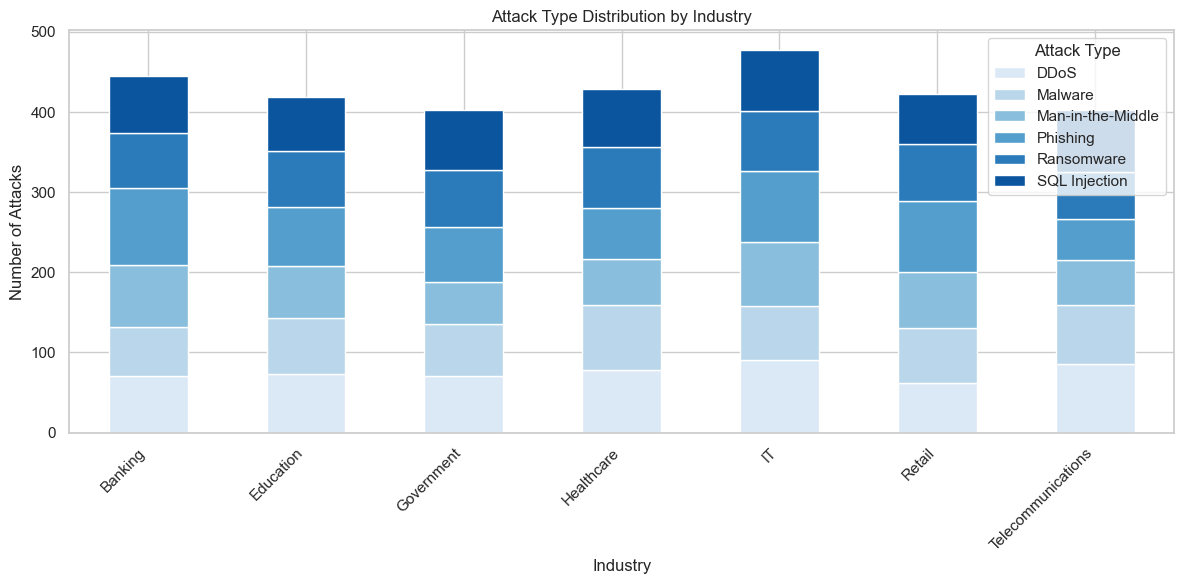

In [49]:
industry = df.groupby(['Target Industry', 'Attack Type']).size().unstack(fill_value=0)
industry.plot(kind='bar', stacked=True, figsize=(12, 6), color=blue_palette[:len(industry.columns)])

plt.title('Attack Type Distribution by Industry')
plt.xlabel('Industry')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


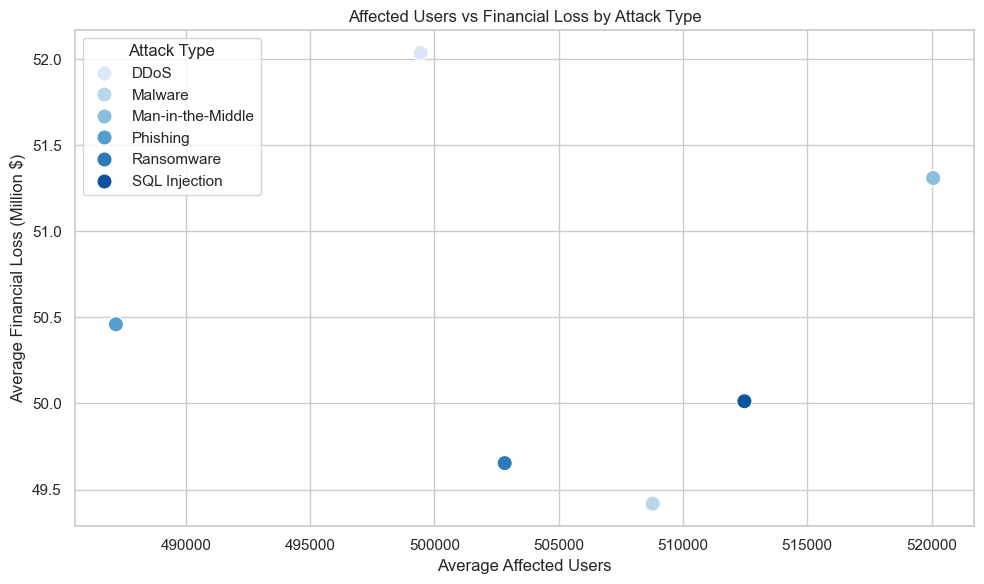

In [50]:
avg_stats = df.groupby('Attack Type')[['Number of Affected Users', 'Financial Loss (in Million $)']].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=avg_stats, 
                x='Number of Affected Users', 
                y='Financial Loss (in Million $)', 
                hue='Attack Type', 
                palette=blue_palette[:len(avg_stats)],
                s=120)

plt.title('Affected Users vs Financial Loss by Attack Type')
plt.xlabel('Average Affected Users')
plt.ylabel('Average Financial Loss (Million $)')
plt.tight_layout()
plt.show()
